# Notebook to try a more sophisticated spike detection

## Imports

In [1]:
import os 
import glob
import pickle
import pywt 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

# from matplotlib import rcParams
from mosquito.process_abf import load_processed_data

## Try it out

In [2]:
# load example data set
data_folder = 40
axo_num = 6

data = load_processed_data(data_folder, axo_num)


In [13]:
# read data 
fs = data['sampling_freq']
t = data['time']
emg = data['emg']
emg_filt = data['emg_filt']
spike_idx = data['spike_idx']

# restrict attention to less data so it goes faster
tmin = 0
tmax = 0.1
mask = (t >= tmin) & (t <= tmax)

time = t[mask]
chirp = emg[mask]
chirp_filt = emg_filt[mask]
spike_idx = spike_idx[t[spike_idx] < tmax]

In [14]:
# try cwt (https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)

wavelet = 'gaus3'
widths = np.geomspace(1, 1024, num=100)
sampling_period = 1/fs
cwtmatr, freqs = pywt.cwt(chirp, widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

# # visualize 
# fig, axs = plt.subplots(2, 1)
# pcm = axs[0].pcolormesh(time, freqs, cwtmatr)
# axs[0].set_yscale("log")
# axs[0].set_xlabel("Time (s)")
# axs[0].set_ylabel("Frequency (Hz)")
# axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
# fig.colorbar(pcm, ax=axs[0])

# # plot fourier transform for comparison
# from numpy.fft import rfft, rfftfreq

# yf = rfft(chirp)
# xf = rfftfreq(len(chirp), sampling_period)
# plt.semilogx(xf, np.abs(yf))
# axs[1].set_xlabel("Frequency (Hz)")
# axs[1].set_title("Fourier Transform")
# plt.tight_layout()

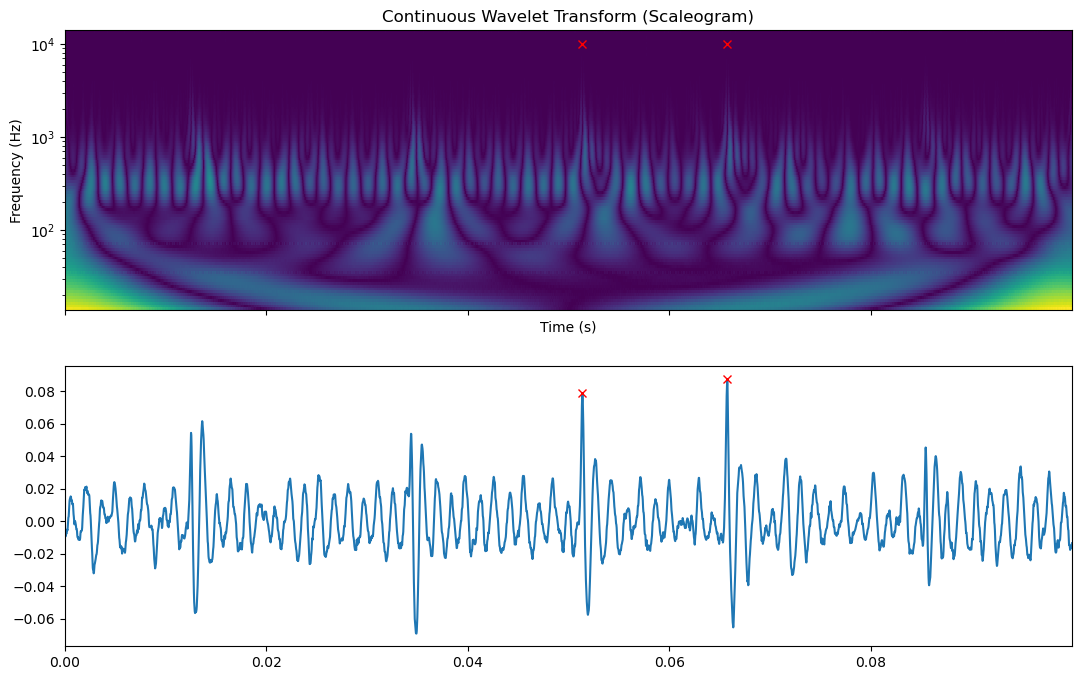

In [15]:
# just replot on bigger scale (NB: this takes forever)
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13,8), sharex=True)
pcm = ax0.pcolormesh(time, freqs, cwtmatr)
ax0.set_yscale("log")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Frequency (Hz)")
ax0.set_title("Continuous Wavelet Transform (Scaleogram)")
# fig.colorbar(pcm, ax=ax0)

ax1.plot(time, chirp_filt)

for idx in spike_idx:
    ax0.plot(time[idx], 1e4, 'rx')
    ax1.plot(time[idx], chirp_filt[idx], 'rx')